In [2]:
!pip install pandas
!pip install jieba
!pip install matplotlib

  Using cached pandas-1.0.4-cp37-cp37m-win_amd64.whl (8.7 MB)
  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
  Using cached jieba-0.42.1.tar.gz (19.2 MB)
Using legacy setup.py install for jieba, since package 'wheel' is not installed.
    Running setup.py install for jieba: started
    Running setup.py install for jieba: finished with status 'done'
  Using cached matplotlib-3.2.1-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)


In [4]:
import pandas as pd
import numpy as np
import math
import json
import os

# 視覺化
import matplotlib.pyplot as plt  ## python最常見的繪圖工具
import matplotlib

# 斷字
import jieba
jieba.set_dictionary('C:/Users/bessyhuang/Downloads/409066015_final_proj/dict.txt.big')

def preprocess(question):
	words = list(jieba.cut(question)) ## 精準模式
	return words

# 從博碩士論文加值系統爬取，儲存至 MongoDB 再 export .json (430筆) 
# C:\Users\bessyhuang\Downloads\paper_getting_onebyone.py
def getdata():
    with open('C:/Users/bessyhuang/Downloads/409066015_final_proj/430_raw_paper_json.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

df_train = getdata()
print("Rows = ", len(df_train), '\n=========\n')
print(df_train.head(), '\n=========\n')


Rows =  430 

                                    _id  id  研究生          研究生(外文)  \
0  {'$oid': '5ee7716931a91b068e466c26'}   1  凌榕穗  Ling, Rong-Suei   
1  {'$oid': '5ee7716b31a91b068e466c28'}   2  顏士凱     Yen,Shih Kai   
2  {'$oid': '5ee7716d31a91b068e466c2a'}   3  歐瑞敏       Jui Min-Ou   
3  {'$oid': '5ee7716f31a91b068e466c2c'}   4  聶雅婷       Nie Ya-Tin   
4  {'$oid': '5ee7717131a91b068e466c2e'}   5  王雪如    Hsueh-Ju Wang   

                                論文名稱  \
0          次線性泛函之平滑性與嚴格凸性的Asplund平均化   
1                 足球運動教練專業知識與技術能力之研究   
2  運動與體適能家庭作業介入對肥胖學童健康體適能、運動認知與態度之影響   
3        從「默觀」看東西文化交流與對話──十字若望與莊子的對談   
4                估計Gamma製程中干擾啟始時間之研究   

                                            論文名稱(外文)     指導教授 學位類別  校院名稱  \
0  Asplund averaging of smoothness and rotundity ...      何清人   碩士  輔仁大學   
1  The Study of Professional Knowledge and Skill ...      陳鴻雁   碩士  輔仁大學   
2  Effects of Exercise Training and Physical Fitn...      張宏亮   碩士  輔仁大學   
3  To See the commmunicait

In [5]:
# '論文名稱' & '摘要' 斷詞後，將其結果合併 加入 df_train['words']
words1 = df_train['論文名稱'].astype(str).apply(preprocess)
print(words1, '\n=========\n')
words2 = df_train['摘要'].astype(str).apply(preprocess)
print(words2, '\n=========\n')


df_train['words'] = words1 + words2
print(df_train['words'], '\n---------\n')
print(df_train.head())

Building prefix dict from C:\Users\bessyhuang\Downloads\409066015_final_proj\dict.txt.big ...
Dumping model to file cache C:\Users\BESSYH~1\AppData\Local\Temp\jieba.u813e690ac7055fdb60b803cf9566915f.cache
Loading model cost 3.568 seconds.
Prefix dict has been built successfully.


0      [次, 線性, 泛函, 之, 平滑, 性, 與, 嚴格凸, 性, 的, Asplund, 平均化]
1                     [足球運動, 教練, 專業知識, 與, 技術, 能力, 之, 研究]
2      [運動, 與體, 適能, 家庭作業, 介入, 對, 肥胖, 學童, 健康, 體適, 能, 、...
3      [從, 「, 默觀, 」, 看, 東西, 文化交流, 與, 對話, ─, ─, 十字, 若望...
4                  [估計, Gamma, 製程, 中, 干擾, 啟始, 時間, 之, 研究]
                             ...                        
425    [代言人, 式, 電視, 運動, 廣告, 體驗, 認知, 以, 消費者, 購買, 動機, 觀...
426            [蟻群, 系統, 於, 多, 目標, 流程, 式, 排程, 有效, 解之, 研究]
427             [在, 控制, 市場, 風險, 及, 信用風險, 下, 的, 價值, 投資決策]
428    [抑斥, 現象, 與, 僭, 越, 界線, ：, 旻, 娜, ‧, 洛伊, 前衛, 詩學, ...
429                                     [英倫, 旅遊, 繪本, 創作]
Name: 論文名稱, Length: 430, dtype: object 

0      [在, 本, 論文, 中, ，, 我們, 所, 探討, 的, 部分, 是, 有, 關於, 次...
1      [本, 研究, 之, 主要, 目的, ，, 在於, 針對, 足球運動, 教練, 進行, 專業...
2      [\n, 本, 研究, 的, 目的, 在, 探討, 運動, 與體, 適能, 家庭作業, 介入...
3      [\n, 本文, 是從, 「, 默觀, 」, 來看, 東西, 文化交流, 與, 對話, ，,...
4      [\n, 製程, 人員, 持續, 地, 在, 改善, 製程, ，, 而, 改善, 製程, 的...
                             ...               

In [6]:
# 為了訓練需要，將 '學類'類別 轉化為數字類別(0~33類)
cat_mapping = {}
for num, cat in enumerate(list(set(df_train['學類']))):
    cat_mapping[cat] = num
    
# 預測時，要將預測出的結果翻譯為原先的類別所使用
inversed_cat_mapping = {}
for cat, idx in cat_mapping.items():
    inversed_cat_mapping[idx] = cat
print(cat_mapping, '\n=========\n')
print(inversed_cat_mapping)


{'宗教學類': 0, '美術學類': 1, '歷史學類': 2, '企業管理學類': 3, '公共衛生學類': 4, '電資工程學類': 5, '中國語文學類': 6, '心理學類': 7, '餐旅服務學類': 8, '化學學類': 9, '生物學類': 10, '專業科目教育學類': 11, '其他商業及管理學類': 12, '外國語文學類': 13, '護理學類': 14, '翻譯學類': 15, '景觀設計學類': 16, '一般商業學類': 17, '物理學類': 18, '一般大眾傳播學類': 19, '音樂學類': 20, '一般法律學類': 21, '會計學類': 22, '財務金融學類': 23, '經濟學類': 24, '電算機一般學類': 25, '營養學類': 26, '哲學學類': 27, '社會工作學類': 28, '統計學類': 29, '教育行政學類': 30, '服飾學類': 31, '數學學類': 32, '兒童保育學類': 33} 

{0: '宗教學類', 1: '美術學類', 2: '歷史學類', 3: '企業管理學類', 4: '公共衛生學類', 5: '電資工程學類', 6: '中國語文學類', 7: '心理學類', 8: '餐旅服務學類', 9: '化學學類', 10: '生物學類', 11: '專業科目教育學類', 12: '其他商業及管理學類', 13: '外國語文學類', 14: '護理學類', 15: '翻譯學類', 16: '景觀設計學類', 17: '一般商業學類', 18: '物理學類', 19: '一般大眾傳播學類', 20: '音樂學類', 21: '一般法律學類', 22: '會計學類', 23: '財務金融學類', 24: '經濟學類', 25: '電算機一般學類', 26: '營養學類', 27: '哲學學類', 28: '社會工作學類', 29: '統計學類', 30: '教育行政學類', 31: '服飾學類', 32: '數學學類', 33: '兒童保育學類'}


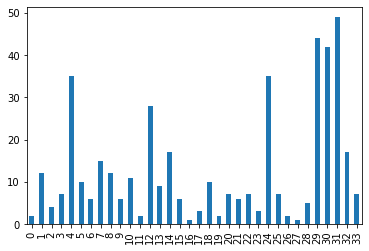

A 一般商業學類 	論文篇數： 2
B 一般大眾傳播學類 	論文篇數： 12
C 一般法律學類 	論文篇數： 4
D 中國語文學類 	論文篇數： 7
E 企業管理學類 	論文篇數： 35
F 兒童保育學類 	論文篇數： 10
G 公共衛生學類 	論文篇數： 6
H 其他商業及管理學類 	論文篇數： 15
I 化學學類 	論文篇數： 12
J 哲學學類 	論文篇數： 6
K 外國語文學類 	論文篇數： 11
L 宗教學類 	論文篇數： 2
M 專業科目教育學類 	論文篇數： 28
N 心理學類 	論文篇數： 9
O 教育行政學類 	論文篇數： 17
P 數學學類 	論文篇數： 6
Q 景觀設計學類 	論文篇數： 1
R 會計學類 	論文篇數： 3
S 服飾學類 	論文篇數： 10
T 歷史學類 	論文篇數： 2
U 營養學類 	論文篇數： 7
V 物理學類 	論文篇數： 6
W 生物學類 	論文篇數： 7
X 社會工作學類 	論文篇數： 3
Y 統計學類 	論文篇數： 35
Z 經濟學類 	論文篇數： 7
a 美術學類 	論文篇數： 2
b 翻譯學類 	論文篇數： 1
c 護理學類 	論文篇數： 5
d 財務金融學類 	論文篇數： 44
e 電算機一般學類 	論文篇數： 42
f 電資工程學類 	論文篇數： 49
g 音樂學類 	論文篇數： 17
h 餐旅服務學類 	論文篇數： 7


In [7]:
#顯示 340筆 所蒐集論文數量的類別分布
main_series = df_train.groupby('學類').count()['論文名稱']
main_series.plot(kind='bar', use_index=False)
plt.savefig(os.path.join('paper_category_pic', 'nums_of_queries_each_cat'))
plt.show()

for i in range(len(list(main_series.index))):
    label = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
    print(label[i], main_series.index[i], '\t論文篇數：', list(main_series)[i])


In [9]:
!pip install wordcloud

  Using cached wordcloud-1.7.0-cp37-cp37m-win_amd64.whl (157 kB)
  Using cached Pillow-7.1.2-cp37-cp37m-win_amd64.whl (2.0 MB)


@@ 宗教學類

 [該學類之某一論文的斷詞結果]
32     [瑪利亞, 與, 母親, 原型, ─, ─, 榮格, 分析, 心理學, 派, 之, 評析, ...
305    [墨子, 與, 耶穌, 之愛的, 比較, 在, 多變, 而, 動盪, 的, 時代, 流動, ...
Name: words, dtype: object

 [index, Paper_id]
32      33
305    306
Name: id, dtype: int64

['瑪利亞', '與', '母親', '原型', '─', '─', '榮格', '分析', '心理學', '派', '之', '評析', '聖母', '學', '從教', '父', '時期', '發展', '至', '梵二', '大公', '會議', '後', '四十年', '的', '今天', '，', '需要', '新', '的', '活力', '及', '不同', '面向', '的', '交談', '，', '尤其', '在', '台灣', '這塊', '多元', '宗教', '的', '土地', '上', '，', '瑪利亞', '被', '誤認', '為', '另', '一位', '女神', '，', '天主教', '被', '誣為', '拜', '瑪利亞', '的', '宗教', '，', '一切', '只', '因', '對', '瑪利亞', '的', '「', '尊敬', '」', '太過', '。', '希望', '藉由', '瑪利亞', '母親', '圖像', '與', '母親', '原型', '的', '了解', '與', '對話', '，', '重新', '詮釋', '瑪利亞', '母親', '職務', '性質', '，', '也', '希望', '藉由', '榮格', '的', '宗教', '心理學', '來', '豐富', '聖母', '學', '，', '增進', '對', '瑪利亞', '母親', '角色', '的', '了解', '，', '認識', '這位', '在', '人', '心目', '中', '最', '偉大', '的', '母親', '。', ' ', ' ', ' ', ' ', '天主教', '有關', '聖母', '瑪利亞', '的', '道理', '和

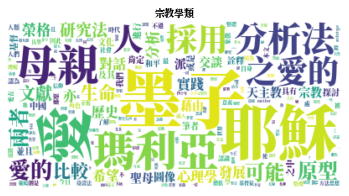

@@ 美術學類

 [該學類之某一論文的斷詞結果]
224    [「, 出口, 」, －, 海洋生物, 的, 碎形, 表現, \n, 遼闊, 無邊, 的, ...
429    [英倫, 旅遊, 繪本, 創作, 本, 創作, 研究, 是, 以, 「, 英倫, 旅遊, 繪...
Name: words, dtype: object

 [index, Paper_id]
224    225
429    430
Name: id, dtype: int64

['「', '出口', '」', '－', '海洋生物', '的', '碎形', '表現', '\n', '遼闊', '無邊', '的', '大', '藍', '，', '是', '生之始', '、', '萬物', '歸之處', '，', '海洋', '是', '全球', '百分之九十九', '的', '生物', '棲地', '，', '也', '主宰', '著', '地球', '的', '氣候變化', '、', '物質', '循環', '及', '整個', '生態系', '的', '正常', '運作', '；', '然而', '幾個', '世紀', '以來', '，', '社會', '一直', '被', '笛卡兒', '的', '線性', '思維', '與', '牛頓', '的', '化約', '宇宙觀', '所', '主宰', '著', '，', '人定勝天', '是', '化約', '主義者', '的', '夢想', '，', '此', '體系', '下', '的', '科技', '產物', '卻', '使得', '地球', '生態環境', '遭到', '嚴重破壞', '，', '海洋', '正', '面臨', '著', '種種', '環境', '問題', '。', '1970', '年代', '出現', '的', '「', '混沌', '」', '（', 'Chaos', '）', '、', '「', '碎形', '」', '（', 'Fractal', '）', '理論', '，', '是', '一種', '對於', '整體性', '、', '混沌', '及', '變易', '觀念', '的', '全新', '認識', '，', '充份', '反映', '後現代', '之', '各式', '不', 

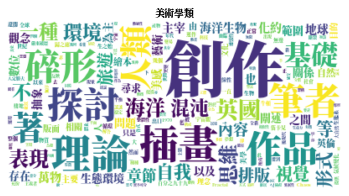

@@ 歷史學類

 [該學類之某一論文的斷詞結果]
254    [試論, 羅, 孝全, 對, 太平天國, 的, 態度, 與, 影響, 羅, 孝全, （, I...
418    [十九世紀, 英國, 娼妓, 問題, 的, 討論, 隨著, 十七世紀, 科學, 革命, 與,...
Name: words, dtype: object

 [index, Paper_id]
254    255
418    419
Name: id, dtype: int64

['試論', '羅', '孝全', '對', '太平天國', '的', '態度', '與', '影響', '羅', '孝全', '（', 'I', '.', ' ', 'J', '.', ' ', 'Roberts', ',', ' ', '1802', '-', '1871', '）', '是', '十九世紀', '美國', '浸信會', '（', 'American', ' ', 'Baptist', '）', '來華', '傳教士', '，', '以其', '曾', '為', '洪秀全', '的', '宗教', '導師', '及', '與', '太平天國', '的', '特殊', '關係', '而', '著名', '。', '1847', '年', '，', '羅', '孝全', '曾', '指導', '洪秀全', '研習', '基督教', '義', '，', '其間', '羅', '孝全', '對', '其', '印象', '頗佳', '，', '並認', '為', '他', '所', '陳述', '之異象', '類似', '天使', '的', '感召', '。', '雖然', '洪秀全', '學道', '的', '時間', '僅有', '二月', '餘', '，', '但', '這些', '經驗', '對', '日後', '太平天國', '宗教', '的', '內涵', '與', '儀式', '，', '曾', '產生', '一定', '程度', '的', '影響', '。', '至', '1852', '年', '，', '羅', '孝全', '在', '獲知', '太平天國', '的', '領導人', '為', '洪秀全', '後', '，', '曾', '認為', '太平軍', '是', '在

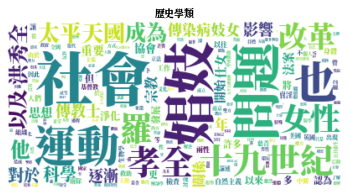

@@ 企業管理學類

 [該學類之某一論文的斷詞結果]
40     [中小企業, 間, 非正式, 人際, 互動, 、, 社會, 資本, 與, 企業, 經營, 發...
41     [多, 目標, 之, 單機, 排程, 研究, -, 含, 總, 流程, 時間, 與, 提前,...
63     [健康, 體適, 能, 俱樂部, 購買, 意願, 之, 影響, 因素, 近年來, ，, 隨著...
77     [工作, 價值觀, 、, 個人, 倫理, 氣候, 知覺, 與, 倫理, 行為, 關係, 之,...
79     [探討, 負面, 口碑, 傳播, 與, 消費者, 轉換, 意願, 之, 關係, 論文, 題目...
197    [迷信, 消費, 利益, 與, 成本, 之, 探討, \n, 迷信, 的, 現象, 普遍存在...
206    [好禮, 多, 選一, 之, 適用, 情境, 分析, \n, 在, 台灣, 「, 好禮, 多...
220    [個人, 投資者, 股票, 重購, 行為, 再, 探, \n, 本, 研究, 主要, 探討,...
221    [機構, 投資人, 影響, 個人, 投資者, 群聚, 行為, 之, 研究, \n, 近年來,...
222    [商店, 環境, 、, 品牌, 知名度, 對, 消費者, 認知, 信任, 、, 情感, 信任...
230    [數位, 相機, 產業, 之, 競爭, 策略, 研究, -, 以, 個案, 公司, 品牌, ...
231    [台電, 公司, 營業, 區處, 技術人員, 核心, 職能, 辨識, 與, 職能, 表現, ...
233    [多, 目標, 重疊式, 流程, 系統, 之, 排程, 研究, 在, 流程, 式, 工廠, ...
267    [多, 目標, 流程, 式, 排程, 有效, 解之, 研究, 無論, 在, 實務, 應用, ...
275    [處置, 效果, 與, 報酬, 動能, 關係, 之, 探討, 本, 研究, 探討, 動能, ...
276    [服務, 創新, 、, 情緒, 體驗, 與, 忠誠, 意圖, 之, 關係, －, 以, 主題...
289    [企業, 識別系統, 、, 體驗, 行銷, 對, 品牌形象, 關係, 之, 研究, —, 以...
290

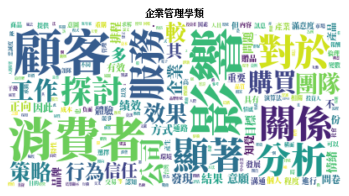

@@ 公共衛生學類

 [該學類之某一論文的斷詞結果]
48     [大氣, 微粒, 中, 指紋, 化合物, 之, 調查, 研究, \n, 本, 研究, 分別,...
122    [女性, 護理人員, 之, 罹病, 風險, 及, 常見疾病, 之, 研究, 背景, 和, 目...
135    [高, 濁度, 原水, 之, 粒徑, 分布, 及, 沉降, 性, 研究, 本, 研究, 探討...
218    [染髮劑, 對, 防護, 手套, 之, 滲透, 評估, 胺基, 苯酚, ﹙, aminoph...
242    [住院病人, 留置, 尿管, 盛行, 率及, 導尿管, 相關, 尿路感染, 之, 菌種, 與...
339    [高壓, 輸電線, 密度, 與, 兒童, 癌症, 發生率, 之, 流行病學, 研究, 背景,...
Name: words, dtype: object

 [index, Paper_id]
48      49
122    123
135    136
218    219
242    243
339    340
Name: id, dtype: int64

['大氣', '微粒', '中', '指紋', '化合物', '之', '調查', '研究', '\n', '本', '研究', '分別', '針對', '兩座', '都市', '垃圾', '焚化', '廠', '之', '煙道', '、', '集塵', '飛灰', '與', '周界', '環境', '進行', '粒狀', '物中', '指紋', '化合物', '成分', '調查', '，', '此外', '也', '針對', '環境', '中', '可能', '的', '污染', '來源', '進行', '樣本', '收集', '與', '分析', '，', '以主', '成分', '分析法', '作為', '鑑定', '周界', '環境污染', '來源', '之', '參考', '依據', '。', '微粒', '中', '指紋', '化合物', '分析', '項目', '包含', 'PAHs', '、', '金屬', '成分', '與', '水溶性', '陰陽', '離子', '。', 'PAHs', '以', 'GC', '/', 'MS', '分析', '36'

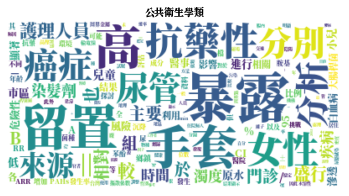

@@ 電資工程學類

 [該學類之某一論文的斷詞結果]
9      [定量化, 暫存, 記憶體, 的, 已, 排班, 資料, 流, 架構, 在, 這篇, 論文,...
19     [運用, 赫序, 函數, 之, 通行, 碼, 身份, 認證, 設計, 的, 分析, 與, 改...
23     [應用, 文化, 演算法, 於, 多, 代理人, 系統, 之, 共同, 演化, 在, 這篇,...
34     [異質, 無線網, 路, 互運, 的, 可, 調整, 行動, 管理機制, \n, 異質, 無...
57     [頭部, 點頭, 識別, 本, 論, 文, 說, 明, 一個, 自動, 偵測, 和, 識, ...
64     [新群體, 盲目, 多, 使用者, 偵測器, 在, 多通道, 路徑, 的, 直接, 序列, ...
72     [快速, 人頭, 追蹤, 演算法, 摘,  ,  , 要本, 論文, 提出, 一種, 橢圓形...
82     [基於, 最大, 距離, 小波樹, 量化, 之, 浮水印, 方法, 本篇, 論文, 提出, ...
114    [基於, Haar, 小波, 轉換, 之, 動態, 估算, 演算法, 本, 專題研究, 是,...
153    [分散式, 雜湊, 法為, 基礎, 檔案, 分享, 策略, 在, P2P, 檔案, 分享, ...
158    [OFDM, 系統, 之, 指標, 協助, 通道, 估測, 法, 的, 研究, \n, 近年...
159    [使用, 圖形化, 通行, 碼, 之, 使用者, 身份, 認證, 設計, 的, 研究, 文字...
162    [在, 4, 傳空, 時碼, MC, -, CDMA, 系統, 下, 盲目, 通道, 估測,...
179    [在, uClinux, 上, 設計, Time, -, Triggered, &, Eve...
184    [盲目, 通道, 估測, 應, 用於, 不, 加, 循環, 字首, 的, 正交, 分頻, 多...
194    [適用於, 多, 伺服器, 架構, 之, 通行, 碼, 身份, 認證, 協定, 使用者, 身...
201    [半, 盲目, 通道, 估測, 的, 開發, 及, 接收機, 設計, 應, 用於, 多, 輸...
205

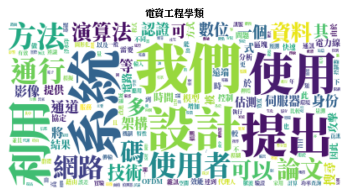

@@ 中國語文學類

 [該學類之某一論文的斷詞結果]
24     [黃, 季剛, 先生, 說, 文學, 之, 研究, 提,  ,  ,  ,  ,  ,  ,...
70     [先秦, 兩漢, 孔子, 形象, 演變, 之, 研究, \n, 　, 　, 春秋, 時, ，...
73     [方以智, 易學, 形上, 思想, 研究, \n, 論文, 提要, 本文, 旨在, 研究, ...
173    [《, 唐詩, 歸, 》, 之, 詩學, 觀, 研究, \n, 明代, 唐詩, 選本, 編選...
336    [郭嵩燾, 教育, 思想, 與, 實踐, 論文, 摘要, 郭嵩燾, ，, 一個, 傳統, 儒...
380    [陸時, 雍, 《, 唐詩, 鏡, 》, 之, 詩學, 理論, 研究, \n, 選本, 為,...
382    [《, 集韻, 》, 增收, 叶韻, 字, 字音, 研究, 我國, 最早, 的, 韻書, 為...
Name: words, dtype: object

 [index, Paper_id]
24      25
70      71
73      74
173    174
336    337
380    381
382    383
Name: id, dtype: int64

['黃', '季剛', '先生', '說', '文學', '之', '研究', '提', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '要', ' ', ' ', ' ', ' ', '黃', '季剛', '先生', '為繼', '章太炎', '先生', '之後', '的', '國學', '大師', '，', '在', '語言', '文字學', '史上', '，', '與', '太炎', '先生', '共同', '開創', '二十世紀', '上半葉', '最具', '代表性', '的', '章', '黃', '學派', '。', '就', '《', '說文', '》', '研究', '而言', '，', '太炎', '先生', '以', '其', '宏博', '的', '視野', '，', '對', '《', '說文', '》', '的', '內容', '進行', '全面', '的', '綜理

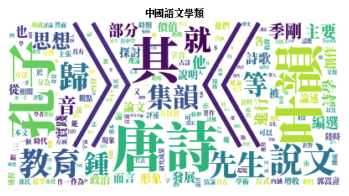

@@ 心理學類

 [該學類之某一論文的斷詞結果]
18     [國民中學, 國文, 教科書, 編排, 設計, 之, 易讀性, 與, 閱讀, 眼動, 研究,...
223    [親密, 著床, 情欲, …, 流動, 潛抑, 浮現, 洄觀, \n, 一個, 親密, 經驗...
283    [阻塞性, 睡眠, 呼吸, 中止, 症, 患者, 情緒, 狀態, 與, 疾病, 嚴重, 度,...
343    [探討, 兒童, 與, 成人, 對於, 疾病, 病因, 和, 預防, 之, 概念, 摘要, ...
357    [健康, 焦慮, 特徵, 與, 情緒, 間, 的, 調節, 因素, ：, 探討, 健康, 認...
385    [我, 因思愛成, 病, -, 生命, 意義, 的, 追尋, \n, 這是, 一個, 有關,...
399    [當我, 這樣, 唱, ：, 生命, 故事, 觀點, 看, 張雨生, 音樂創作, 的, 心路...
413    [一位, 多重, 障礙, 兒, 母親, 的, 生命, 處境, ：, 自我, 敘說, 探究, ...
419    [領導, 行為, 與, 部屬, 忠誠, -, 人治, 、, 法治, 企業, 文化, 脈絡, ...
Name: words, dtype: object

 [index, Paper_id]
18      19
223    224
283    284
343    344
357    358
385    386
399    400
413    414
419    420
Name: id, dtype: int64

['國民中學', '國文', '教科書', '編排', '設計', '之', '易讀性', '與', '閱讀', '眼動', '研究', '本', '論文', '的', '研究', '目的', '為', '探討', '現行', '國民中學', '國文', '教科書', '，', '何種', '課文', '注釋', '的', '編排', '設計', '對', '閱讀', '易讀性', '最', '有利', '，', '並對', '現行', '教科書', '之', '字體', '、', '文字', '排列', '方式', '進行', '改良', '設計', '實驗', '，', 

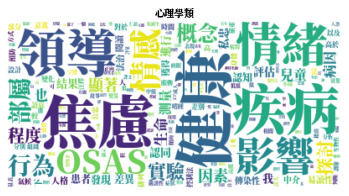

@@ 餐旅服務學類

 [該學類之某一論文的斷詞結果]
108    [消費者, 對, 不同, 零售業, 的, 服務, 品質, 與, 商店, 形象, 影響, 購買...
195    [都會區, 連鎖, 便利商店, 消費者, 行為, 之, 研究, 本, 研究, 旨在, 了解,...
207    [觀光, 意象, 與, 體驗, 價值, 對行, 為, 意向, 之, 研究, -, 以, 平溪...
249    [台灣餐, 旅, 產業, 之, 團隊, 賦能, 、, 流程, 改進, 與, 創新, 行為, ...
255    [以, ATP, 生物, 冷光, 方法, 預測, 盒餐, 微生物, 品質, \n, 本, 研...
366    [國際, 觀光旅館, 外賣, 專櫃, 品牌, 延伸, 契合, 度, 對, 消費者, 行為, ...
375    [台灣餐, 旅, 產業, 之, 社會, 網絡, 、, 知識, 移轉, 與, 新, 產品開發,...
Name: words, dtype: object

 [index, Paper_id]
108    109
195    196
207    208
249    250
255    256
366    367
375    376
Name: id, dtype: int64

['消費者', '對', '不同', '零售業', '的', '服務', '品質', '與', '商店', '形象', '影響', '購買決策', '之', '研究', '-', '以', '即食', '年', '菜', '為例', '即食', '年', '菜', '產品', '的', '銷售', '由', '市場', '所', '反應', '的', '熱烈', '程度', '與', '市場趨勢', '來看', '，', '將是', '一股', '新興', '的', '市場', '商機', '。', '若能', '瞭解', '消費者', '對於', '即食', '年', '菜', '產品', '的', '要求', '，', '有助於', '日後', '的', '銷售', '與', '經營', '。', '故此', '，', '本', '研究', '將以', '消費者', '觀點', '檢視', '目前', '市面上', '由', '便利商

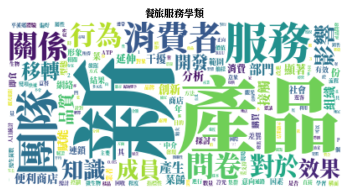

@@ 化學學類

 [該學類之某一論文的斷詞結果]
132    [以, 銪, 金屬, 錯合物, 為, 三重態, 能量, 接收者, 之電, 激發, 光, 研究...
136    [以, 銥, 金屬, 錯合物, 為, 三重態, 能量, 接收者, 之電, 激發, 光, 研究...
142    [以, PU, /, Epoxy, 複合材料, 製作, PDLC, 之, 可行性研究, 摘要...
151    [奈米金, 氣體, 感測, 材料, 之, 線性, 溶合, 能量, 關係, 模式, 與, 圖形...
157    [聚苯胺, -, DBSA, ／, 聚, 壓克力, 酸, 摻合, 材料, 之, 製備, 與其...
178    [環, 丙烯, 之, 〔, 2, +, 2, 〕, 環化, 加成反應, 1, ,, 1, ,...
181    [胺基, 蒙托, 土改, 質, 水性, PU, 之, 研究, 本, 實驗, 為, 利用, 有...
182    [以, V2O5, 或, TiO2, 做, 為, 注入, 層, 材料, 用以, 提升, 有,...
183    [有機, 發光, 材料, -, 奈米, 片層, 矽土, /, PVK, 複合材料, 系統, ...
232    [3, -, 苯, 硫基, -, 4, -, 取代, 基, 丁二烯, □, 的, 合成, 及...
261    [聚苯胺, /, 聚, 壓克力, 酸, 複合材料, 之, 合成, 與介, 電性, 質, 研究...
390    [利用, 溶劑, 和, 取代, 基, 效應, 微調, 經由, 釕, 氨, 吡啶, 錯合物, ...
Name: words, dtype: object

 [index, Paper_id]
132    133
136    137
142    143
151    152
157    158
178    179
181    182
182    183
183    184
232    233
261    262
390    391
Name: id, dtype: int64

['以', '銪', '金屬', '錯合物', '為', '三重態', '能量', '接收者', '之電', '激發', '光', '研究', '在', '有機', '發光'

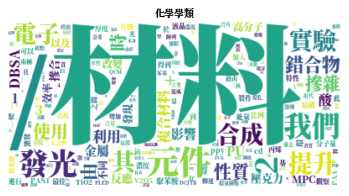

@@ 生物學類

 [該學類之某一論文的斷詞結果]
169    [三氧化二砷, 抑制, 小白鼠, 精蟲, 之, 分化, 及, 活性, 三氧化二砷,  , (...
287    [台灣, 溫泉, 區, 新穎, 嗜, 熱性, alphaproteobacteria, 之,...
316    [Xanthomonas, 屬, 植物, 病原, 細菌, 之, 檢測, 及, 分子, 類型,...
326    [點帶, 石斑, 抗, 黏液, 病毒, 與, 免疫, 球蛋白, 重鏈, 基因, 在, 胚胎,...
360    [基因, 轉殖, 菊花, 表現, 大麥, HVA1, 基因, 以, 增強, 對, 鹽, 逆境...
361    [基因, 轉殖, 蕃茄, 表現, 單鏈, 人類, 介白素, 12, 之, 基因, 相, 較,...
367    [利用, 系統, 生物學, 方法, 和, RNA, 干擾, 術, 探討, 馬鈴薯, L, 型...
Name: words, dtype: object

 [index, Paper_id]
169    170
287    288
316    317
326    327
360    361
361    362
367    368
Name: id, dtype: int64

['三氧化二砷', '抑制', '小白鼠', '精蟲', '之', '分化', '及', '活性', '三氧化二砷', ' ', '(', 'As2O3', ')', ' ', '為', '砒霜', '之', '主要', '成份', '，', '傳統醫學', '中', '利用', '少量', '三氧化二砷', '做', '為', '治療', '疾病', '的', '藥物', '。', '三氧化二砷', '可', '做', '為', '肝癌', '、', '大腸癌', '、', '乳癌', '等', '多種', '癌症', '的', '治療', '藥物', '。', '目前', '並不', '了解', '三氧化二砷', '做', '為', '治療', '藥物', '是否', '對', '病患', '的', '生殖系統', '造成', '影響', '，', '故本', '實驗', '探討', '動物', '施用', '三氧化二砷', '後', '

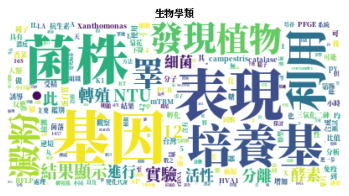

@@ 專業科目教育學類

 [該學類之某一論文的斷詞結果]
1      [足球運動, 教練, 專業知識, 與, 技術, 能力, 之, 研究, 本, 研究, 之, 主...
2      [運動, 與體, 適能, 家庭作業, 介入, 對, 肥胖, 學童, 健康, 體適, 能, 、...
83     [國, 小, 兒童, 田徑, 運動員, 與, 一般, 兒童, 心率, 變異, 度, 之, 比...
84     [大, 學校, 院, 甲組, 桌球, 選手, 知覺, 教練, 領導, 行為, 、, 團隊, ...
152    [台北, 縣, 新莊, 地區, 國中生, 運動, 行為, 及其, 影響, 因素, 之, 研究...
175    [腳踏車, 運動, 對, 高中, 甲組, 籃球, 運動員, 心率, 變異, 度, 之, 效應...
191    [跆拳道, 選手, 運動, 傷害, 之, 調查, 研究, \n, 摘要, 1973, 年, ...
214    [台北, 縣國, 中, 健康, 與, 體育教師, 資訊, 素養, 及, 資訊科技, 融入, ...
241    [慢跑, 與, 爬坡, 之, 地面, 反作用力, 分析, 研究, 運動, 休閒, 參與, 行...
257    [高雄市, 國民中學, 九年, 一貫, 健康, 與, 體育, 學習, 領域, 課程, 實施,...
258    [棒球, 投手, 投球, 動作, 之, 運動學, 分析, 棒球, 投手, 投球, 動作, 之...
266    [棒球, 打擊, 動作, 動學, 之, 分析, 研究, 棒球, 打擊, 動作, 動學, 之,...
270    [慢跑, 與, 爬坡, 步態, 常模, 之, 建立, 本, 研究, 主要, 目的, 在, 測...
278    [運動, 營隊, 參與者, 服務, 品質, 認知, 與, 滿意度, 之, 研究, －, 以,...
291    [柔道, 基層, 選手, 訓練, 站, 運作, 現況, 調查, 之, 研究, —, 以, 台...
298    [慢跑, 與, 爬坡, 對, 心跳, 率, 之, 影響, 本, 研究, 的, 主要, 目的,...
299    [大學, 體育, 室, 服務, 品質, 滿意度, 之, 研究, 以, 萬能, 科技, 大學,...
3

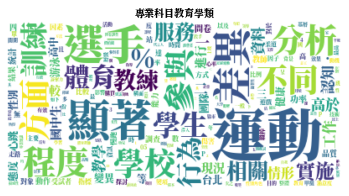

@@ 其他商業及管理學類

 [該學類之某一論文的斷詞結果]
12     [創新, 產品, 發展, 專案, 管理, －, 以, PMP, 產品, 為例, 現今, 科技...
71     [影響, 工程, 統包, 績效, 之, 因素, －, 臺電, 配電, 自動化, 工程, 之,...
74     [創投, 在, 不同, 階段, 投資, 策略, 之, 研究, \n, 過去, 許多, 研究,...
75     [保健食品, 之, 競爭, 策略, -, 以, 特殊, 營養品, 為例, \n, 近年來, ...
97     [企業, 資訊, 系統, 委外, 關鍵, 成功, 因素, 之, 研究, 資訊, 系統, 委外...
107    [視訊, 產業, 物流, 委外, 之, 成本, 效益, 分析, -, A, 公司, 之, 個...
121    [GPS, 產業, 分析, 暨, 企業, 價值, 管理, 之, 研究, -, 以, 麗臺, ...
130    [以, 現金流量, 觀點, 探討, 企業, 獲利, 能力, 電子業, 在, 政府, 政策, ...
131    [數位, 時代, 有線電視, 產業, 之, 價值, 管理, 在, 數位, 匯流, 的, 時代...
170    [筆記型電腦, 產品開發, 之, 研究, -, 以台灣, 筆記型電腦, 代工廠, 為例, 面...
198    [應用, BLOOMBERG, 系統, 評價, 可, 轉換, 公司債, \n, 全球, 金融...
251    [建立, 基層, 行政, 機關, 服務, 品質, 衡量, 模式, -, 以, 臺北市, 內湖...
285    [不動產業, 競爭, 策略, 之, 研究, -, 以東, 煒, 建設, 公司, 為例, 不動...
388    [警察機關, 受理, 報案, e, 化, 平臺, 與, 服務, 品質, 之, 關聯性, 探討...
416    [高爾夫球場, 服務, 品質, 、, 顧客, 滿意度, 與, 消費, 行為, 關係, 之, ...
Name: words, dtype: object

 [index, Paper_id]
12      13
71      72
74      75
75      76
97      98
107    108
1

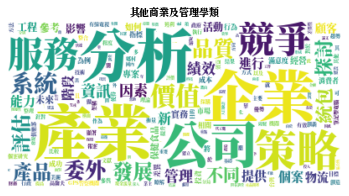

@@ 外國語文學類

 [該學類之某一論文的斷詞結果]
15     [中世紀, 農民, 之, 形成, 由於, 政局, 不定, 、, 經濟, 衰敗, 、, 宗教,...
138    [夏目漱石, 作品, 『, 心, 』, 的, 研究, -, 關於, 「, 家, 」, 一, ...
146    [台灣, 高中, 西班牙文, 之, 演變, 與, 發展, \n, 今日, 世界, ，, 國與...
213    [西班牙文, 外語教學, 中, 之, 口語, 表達, 本, 論文, 共, 分成, 三章, ，...
216    [被, 社會, 扭曲, 的, 個人, 意識, -, 以馬汀, ‧, 瓦爾澤, 之, [, 愛...
273    [翻譯, 的, 文化, 影響, ─, 以, 堂吉訶德, 及, 西遊記, 為例, \n, 近年...
294    [西班牙語, 文學, 中, 的, 佛教, 以波, 赫士, 為例, \n, 本, 論文, 乃,...
337    [日台, 共學, 制度, 之, 研究, -, 以, 對, 台灣, 人, 的, 影響, 為, ...
391    [法文, 幽默, 漫畫, 之, 漢譯, 策略, 與, 實例, 探討, --, 以, 單元, ...
415    [神話, 女性, 人物, 分析, —, 以, 克莉斯, 塔, ‧, 渥夫, 之, 「, 卡,...
428    [抑斥, 現象, 與, 僭, 越, 界線, ：, 旻, 娜, ‧, 洛伊, 前衛, 詩學, ...
Name: words, dtype: object

 [index, Paper_id]
15      16
138    139
146    147
213    214
216    217
273    274
294    295
337    338
391    392
415    416
428    429
Name: id, dtype: int64

['中世紀', '農民', '之', '形成', '由於', '政局', '不定', '、', '經濟', '衰敗', '、', '宗教', '迫害', '及', '日爾曼', '民族', '的', '大', '遷移', '等等', '因素', '使得', '羅馬帝國', '漸漸', '走向', '滅亡'

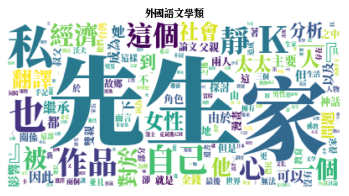

@@ 護理學類

 [該學類之某一論文的斷詞結果]
10     [探討, 鬆弛, 訓練, 對, 外科, 加護, 病房, 術後, 病患, 急性, 疼痛, 及,...
147    [比較, 不同, 口腔, 護理, 方案, 對, 氣管, 內管, 留置, 病患, 口腔, 黏膜...
150    [護理, 小站, 於, 社區, 醫療, 群, 之, 行動, 研究, \n, 「, 社區, 醫...
203    [獨居, 精神分裂症, 病患, 的, 自我, 照顧, 經驗, \n, 中文, 摘要, 本, ...
332    [普, 瑞德, －, 威利, 氏, 症候群, （, Prader, -, Willisynd...
Name: words, dtype: object

 [index, Paper_id]
10      11
147    148
150    151
203    204
332    333
Name: id, dtype: int64

['探討', '鬆弛', '訓練', '對', '外科', '加護', '病房', '術後', '病患', '急性', '疼痛', '及', '焦慮', '緩解', '之', '成效', '本', '研究', '目的', '在', '探討', '鬆弛', '訓練', '對', '緩解', '外科', '加護', '病房', '術後', '病患', '急性', '疼痛', '及', '焦慮', '的', '成效', '，', '並', '瞭解', '鬆弛', '訓練', '對', '外科', '加護', '病房', '病患', '生理', '指標', '及', '住院', '滿意度', '的', '影響', '。', '本', '研究', '以', '立意', '取樣', '方式', '選取', '90', '位', '台北', '巿', '某', '醫學中心', '外科', '加護', '病房', '術後', '病患', '，', '並', '隨機', '分配', '至', '介入', '組', '(', '45', '位', ')', '和', '對照組', '(', '45', '位', ')', '。', '介入', '組', '患者', '於', '術後', '第一天', '開始', '，', '接受

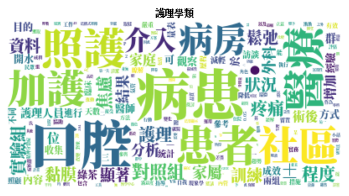

@@ 翻譯學類

 [該學類之某一論文的斷詞結果]
8    [學好, 翻譯, 基本功, ：, 檢視, 台灣國, 中, 英語, 科, 參考書, 的, 課文...
Name: words, dtype: object

 [index, Paper_id]
8    9
Name: id, dtype: int64

['學好', '翻譯', '基本功', '：', '檢視', '台灣國', '中', '英語', '科', '參考書', '的', '課文', '中譯', '問題', '以', '第五冊', '康軒', '、', '南一', '、', '翰林', '、', '朗文', '版', '部分', '課文', '為例', '隨著', '教學法', '的', '演進', '，', '當今', '多數', '國', '中', '英語', '教師', '所', '採行', '的', '溝通', '式', '語言', '教學法', '(', 'Communicative', ' ', 'Language', ' ', 'Approach', ')', '，', '不', '主張', '在', '教學', '過程', '中', '，', '對', '教材內容', '，', '進行', '中文翻譯', '。', '然', '教科書', '出版商', '所', '發行', '的', '英語', '科', '參考書', '，', '多', '仍', '保留', '教材', '的', '全文', '中譯', '。', '本', '論文', '即', '針對', '此', '部份', '加以', '探討', '，', '檢視', '其中', '的', '翻譯', '問題', '，', '也', '藉此', '尋找', '一些', '可能', '在', '國中', '階段', '養成', '的', '不良', '翻譯', '慣性', '。', '並', '以', '市面上', '常見', '的', '四種', '版本', '－', '康軒', '、', '南一', '、', '翰林', '、', '朗文', '版', '的', '第五冊', '為', '討論', '對象', '。', '第一章', '緒論', '，', '旨在', '說明', '本', '論文', '的', '研究'

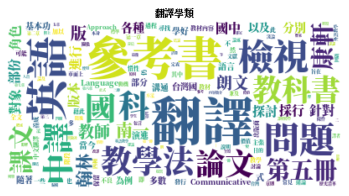

@@ 景觀設計學類

 [該學類之某一論文的斷詞結果]
192    [捷運, 站, 週邊, 社區, 街道, 人行, 環境, 改善, 之, 探討, 及, 設計, ...
Name: words, dtype: object

 [index, Paper_id]
192    193
Name: id, dtype: int64

['捷運', '站', '週邊', '社區', '街道', '人行', '環境', '改善', '之', '探討', '及', '設計', '--', '以', '新莊', '中華路', '一段', '為例', '隨著', '現代', '都市', '交通', '建設', '的', '發展', '，', '便利', '的', '車行', '環境', '雖', '帶來', '無限', '的', '商機', '，', '卻', '也', '嚴重威脅', '到', '人行', '環境', '的', '品質', '。', '台灣', '近年', '所', '針對', '的', '開放', '空間', '改善', '計畫', '多', '以', '點狀', '、', '線狀', '與', '塊狀', '為主', '，', '如', '公園', '綠地', '、', '老街', '再造', '等', '。', '而', '網狀', '的', '開放', '空間', '，', '也', '就是', '街道', '空間', '與', '人行', '環境', '之', '改造', '，', '卻', '因為', '主管機關', '過於', '複雜', '，', '遲遲', '無法', '落實', '。', '根據', '調查', '，', '一般', '都市', '有', '40%', '為', '開放', '空間', '，', '其中', '有', '80%', '為', '街道', '，', '由此可知', '街道', '品質', '對於', '人行', '環境', '的', '影響', '與', '重要性', '。', ' ', ' ', ' ', ' ', '本', '研究', '之', '背景', '在於', '地方', '交通', '重心', '的', '轉移', '，', '新莊', '台一省', '道', '中正路', '與', '週邊', 

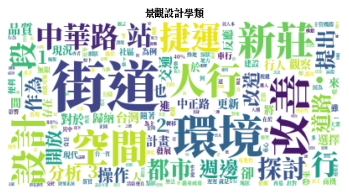

@@ 一般商業學類

 [該學類之某一論文的斷詞結果]
22     [智慧型, 商業, 資料, 分析, 之, 研究, \n, 資料, 分析, 是, 由, 資料,...
168    [策略性, 核心, 職能, 辨認, 模式, 建構, －, 價值, 活動, 與, 流程, 分析...
Name: words, dtype: object

 [index, Paper_id]
22      23
168    169
Name: id, dtype: int64

['智慧型', '商業', '資料', '分析', '之', '研究', '\n', '資料', '分析', '是', '由', '資料', '探測', '智慧', '的', '必經', '途徑', '，', '然而', '在', '商業', '的', '應用', '上', '卻', '充滿著', '各種', '挑戰', '，', '因而', '智慧型', '商業', '資料', '分析', '，', '就是', '針對', '一', '多', '變量', '的', '資料集', '，', '進行', '高層次', '概念', '分析模型', '的', '建立', '。', '此一', '結合', '統計', '與', '資料', '探勘', '運算', '技術', '的', '工具', '，', '克服', '了', '商業', '應用', '上常', '面臨', '的', '資料集', '變動', '頻繁', '、', '資料', '衡量', '尺度', '種類', '很多', '、', '資料', '欄位', '過多', '、', '資料', '欄位', '間', '關係', '複雜', '及', '模型', '配適', '不易', '等', '諸多', '問題', '，', '且', '所', '得出', '的', '模型', '具有', '統計', '上', '的', '可靠性', '，', '並能', '供', '領域專家', '很', '容易', '的', '進行', '解釋', '與', '評估', '。', '換言之', '，', '智慧型', '商業', '資料', '分析', '就是', '針對', '商業', '上', '的', '應用', '，', '結合', '了', '統計'

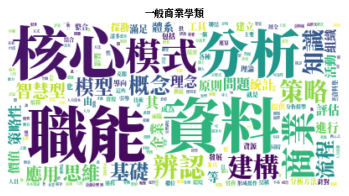

@@ 物理學類

 [該學類之某一論文的斷詞結果]
200    [LCOS, 背投影, 電視, 鏡頭, 設計, 一個, 投影, 系統, 通常, 包含, 一些...
208    [以, B, -, spline, 為, 基底, 的, 複數, 座標, 旋轉, 方法, 來,...
306    [以, end, -, Hall, 型, 離子源, 輔助, 蒸鍍, 硒, 化, 鋅, 薄膜,...
308    [研究, 以, 垂直, 及, 傾斜, 入射光, 線, 監控, 真空鍍膜, 的, 光學, 多層...
348    [複合式, 繞射, 光學, 元件, 影像, 擷取, 鏡頭, 設計, 中文, 摘要,  ,  ...
423    [以六, 氟化, 硫, 為, 工作, 氣體, 之, end, -, Hall, 型, 離, ...
Name: words, dtype: object

 [index, Paper_id]
200    201
208    209
306    307
308    309
348    349
423    424
Name: id, dtype: int64

['LCOS', '背投影', '電視', '鏡頭', '設計', '一個', '投影', '系統', '通常', '包含', '一些', '基本', '的', '元件', '，', '如燈源', '、', '照明', '系統', '、', '偏振', '型', '分束', '鏡', '和', '光閥', '面板', '以及', '投影', '鏡頭', '等', '，', '使用', '的', '光閥', '面板', '又', '有', '穿透', '式', '的', 'TFT', '-', 'LCD', '面板', '和', '反射式', '的', 'LCOS', '面板', '兩種', '，', '這', '兩種', '面板', '的', '差別', '在於', 'LCOS', '的', '驅動', '電路', 'CMOS', '可以', '藏', '在', '金屬', '反射層', '的', '下方', '，', '所以', '開口', '率', '較大', '，', '能', '被', '使用', '的', '光量', '較', '多', '，', '影像', '的'

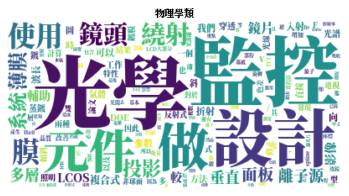

@@ 一般大眾傳播學類

 [該學類之某一論文的斷詞結果]
39     [食品, 污染, 新聞報導, 內容, 與, 品質, 之, 研究, ---, 以, 2005,...
105    [台灣, 男性, 時尚雜誌, 廣告, 與, 男性, 外貌, 形象, 研究, 在, 台灣, ，...
120    [廣告, 訊息, 、, 廣告, 解讀, 與, 消費, 行為, －, 以台灣, 十大, 連鎖,...
177    [媒體, 建構, 的, 台客, 幻想, 世界, —, 以, 【, 兩代, 電力公司, 】, ...
288    [沉默, 螺旋, 理論, 之, 實證, 研究, 以, 週休, 二日, 制為例, 本, 研究,...
344    [個人, 轉寄, 網路, 連鎖, 信, 之, 影響, 因素, 研究, 隨著, 社會, 發展,...
346    [音樂, 、, 色彩, 、, 字幕, 之於, 候選人, 廣告, 的, 效果, 研究, \n,...
353    [魚與熊掌, 可, 兼得, 嗎, ？, 新聞記者, 工作, 與非, 工作, 領域, 間, 角...
376    [電腦, 中介, 傳播, 環境, 下慰語, 訊息, 研究, \n, 本, 研究, 想, 了解...
404    [採訪, 時刻, 記者, 情緒, 展現, 之, 探索, \n, 本, 研究, 試圖, 探討,...
406    [公視, 「, 文學, 劇, 」, ：, 影像, 美學, 、, 文化, 符碼, 與, 性別,...
407    [整合, 行銷, 傳播, 訊息, 一致性, 之, 認知, 反應, 與, 記憶, 效果, 初探...
Name: words, dtype: object

 [index, Paper_id]
39      40
105    106
120    121
177    178
288    289
344    345
346    347
353    354
376    377
404    405
406    407
407    408
Name: id, dtype: int64

['食品', '污染', '新聞報導', '內容', '與', '品質', '之', '研究', '---', '以', '2005', '年', '「', '戴奧辛

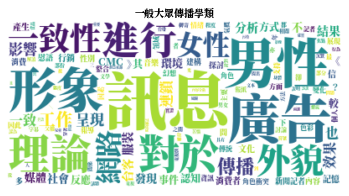

@@ 音樂學類

 [該學類之某一論文的斷詞結果]
14     [布拉姆斯, 六首, 鋼琴, 小品, 作品, 一, 一八, 之, 音樂風格, 與, 演奏, ...
16     [舒曼, 《, 大衛, 同盟, 舞曲, 》, 作品, 六, 之, 音樂, 分析, 與, 詮釋...
17     [哈布斯堡, 王朝, 的, 音樂, 發展, －, 由, 宮廷, 音樂, 邁向, 大眾, 音樂...
20     [聖桑, 低音管, 奏鳴曲, 作品, 168, 之, 分析, 與, 詮釋, \n, 聖桑, ...
27     [舒曼, 《, 狂歡節, 》, 作品, 九, 音樂, 語言, 之, 探究, －, 從, 《,...
29     [莫札特, 法國, 號降, E, 大調, 輪旋曲, 作品, (, K.371, ), 之, ...
33     [約翰, ˙, 塞, 巴斯, 倩, ˙, 巴赫, 第一號, 魯特琴, 組曲, BWV996,...
42     [舒伯特, 長笛, 變奏曲, 《, 枯萎, 的, 花朵, 》, 之, 作品, 研究, 與, ...
43     [從不, 同, 版本, 的, 比較, 探討, 李斯特, 《, 帕格尼尼, 第六號, 練習曲,...
44     [巴爾, 托克, 第二號, 小提琴, 協奏曲, 之, 曲式, 分析, 與, 演奏, 詮釋, ...
45     [史, 特拉, 汶斯, 基給, 小提琴, 與, 鋼琴, 的, 協奏, 風格, 二重奏, 之,...
50     [松下, 耕, 女聲, 合唱, 作品, 《, 愛之, 精選, 》, 之, 分析, 與, 詮釋...
51     [佛瑞, 鋼琴, 作品, 即興曲, 之, 研究, 法國, 作曲家, 佛瑞, （, Gabri...
56     [卡格, －, 埃勒特, ：, 《, 交響, 短歌, 》, 作品, 研究, 及, 詮釋, 探...
61     [初探, 包琳, 和, 理夏德, ．, 史特勞斯, 藝術歌曲, 的, 關係, \n, 理夏德...
76     [亨德, 密特, 第三號, 大提琴, 獨奏, 奏鳴曲, 作品, 編號, 25, 之, 分析,...
102    [艾瑞克, ．, 韋, 塔克, 《, 三首, 花之歌, 》, 之, 分析, 與, 詮釋, \...
Name:

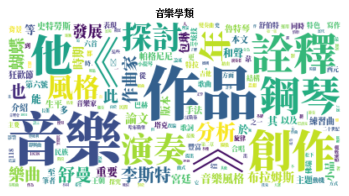

@@ 一般法律學類

 [該學類之某一論文的斷詞結果]
6      [扶養, 義務, 類型論, 之, 研究, --, 以, 生活, 保持, 義務, 之, 論述,...
140    [從, 司法權, 本質論, 司法院, 一元, 單軌制, 之, 改革, 趨勢, --, 以, ...
350    [高齡, 犯罪, 之, 概念, 與, 處遇, 相關, 問題, 之, 探討, 摘要,  ,  ...
352    [未, 遂行, 為, 可, 罰性, 之, 研究, -, 以, 不法, 為, 中心, \n, ...
Name: words, dtype: object

 [index, Paper_id]
6        7
140    141
350    351
352    353
Name: id, dtype: int64

['扶養', '義務', '類型論', '之', '研究', '--', '以', '生活', '保持', '義務', '之', '論述', '為', '中心', '--', '1', '.', '「', '生活', '保持', '義務', '」', '，', '一個', '無法', '在', '我國', '實定', '法上', '被', '找到', '的', '法律', '概念', '，', '自從', '戴炎輝', '、', '陳', '棋炎', '、', '史尚', '寬', '多位', '前輩', '學者', '介紹', '以來', '，', '不僅', '在', '我國', '學界', '廣泛', '的', '使用', '，', '實務', '上', '亦', '屢屢', '將之', '運用', '為', '判決', '說理', '之', '依據', '，', '似乎', '已', '是', '不證', '自明', '之理', '。', '這種', '將', '扶養', '義務', '二分', '為', '生活', '保持', '義務', '與', '生活', '扶助', '義務', '的', '論述', '，', '源頭', '其實', '是', '來自', '日本', '學界', '，', '並', '進而', '支配', '了', '我國', '扶養', '法', '之', '解釋', '。', '然而', '，', '考

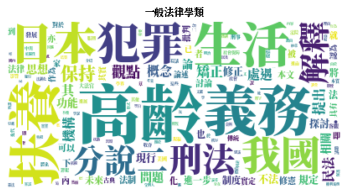

@@ 會計學類

 [該學類之某一論文的斷詞結果]
269    [權益, 交易, 誘因, 、, 分析師, 預測, 引導, 與, 盈餘, 管理, 之, 關係,...
303    [庫藏, 股, 交易, 與, 每股, 盈餘, 管理, －, 購回, 數量, 與, 時點, 之...
386    [員工, 認股權, 之, 會計, 處理, —, 國際, 財務報告, 準則, 第二號, (, ...
Name: words, dtype: object

 [index, Paper_id]
269    270
303    304
386    387
Name: id, dtype: int64

['權益', '交易', '誘因', '、', '分析師', '預測', '引導', '與', '盈餘', '管理', '之', '關係', '本', '研究', '探討', '當', '公司', '存在', '權益', '誘', '因時', '，', '公司', '管理', '階層', '是否', '透過', '盈餘', '管理', '或', '引導', '分析師', '預測', '兩種', '工具', '來', '達成', '分析師', '盈餘', '預測', '。', '同時', '市場', '對於', '探討', '透過', '盈餘', '管理', '或', '引導', '分析師', '預期', '來', '達成', '分析師', '盈餘', '預測', '是否', '會', '有', '不同', '反應', '？', '及', '利用', '未來', '績效', '區辨', '透過', '盈餘', '管理', '或', '引導', '分析師', '預測', '來', '達成', '分析師', '預測', '係', '基於', '投機', '目的', '或', '向', '市場', '傳遞', '未來', '績效', '之', '訊息', '。', ' ', ' ', ' ', ' ', '本', '研究', '之', '實證', '結果', '如下', '：', ' ', ' ', ' ', ' ', '1', '、', '在', '我國', '資本', '市場', '中', '，', '在', '控制', '了', '當年度', '之', '分析師', '預測',

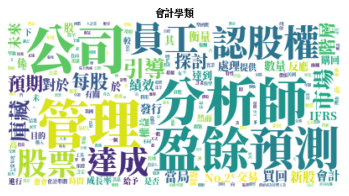

@@ 財務金融學類

 [該學類之某一論文的斷詞結果]
7      [運用, 主, 成份, 分析法, 計算, 台灣, 利率, 市場, 的, 風險, 值, 之, ...
53     [KMV, 模型, 加計, 預期, 虧損, 的, 信用風險, 評等, 本, 論文, 是, 使...
58     [比較, 五種, 流動性, 定義, 在, 台灣, 公債, 殖, 利率, 曲線, 之, 配適,...
95     [新, 巴塞爾, 資本, 協定, 下, 信用, 衍生, 性, 商品, 風險, 抵減, 之, ...
96     [台灣, 公司債, 發行, 信用, 價差, 影響, 變數, 研究, 本, 研究, 主要, 探...
113    [信用, 衍生, 性, 金融工具, 之, 探討, \n, 1997, 年, 亞洲, 金融風暴...
115    [保單, 貼現, 證券化, 評價, 與, 風險, 分析, \n, 保單, 貼現, ,, 保單...
118    [資源配置, 觀點, 之, 企業, 價值, 分析, 本文, 主要, 以, 資源配置, 的, ...
125    [台灣, 勞工, 退休, 基金, 投資, 管理制度, 之, 研擬, 分析, 在, 勞退, 新...
129    [非, 金融機構, 市場, 風險管理, 近幾年, ，, 隨著, 全球, 資訊, 的, 發達,...
145    [擔保, 債權, 憑證, 之, 評價, -, FitchVECTOR, 模型, 與, Gau...
148    [基金, 經理人, 資產, 配置, 與, 追蹤, 標的, 共同, 基金, 存在, 的, 功能...
155    [上市, 審議, 委員會, 決議, 之, 因素, 及, 對, IPOs, 績效, 之, 影響...
156    [反向, 投資, 策略, 的, 績效, 與, 成因, ---, 加入, 外資, 買賣, 超,...
164    [期貨, 結算, 系統, SPAN, 之, 研究, 本文, 在, 標準, 組合, 風險, 分...
166    [台灣, 上市公司, 股權結構, 的, 決定, 因素, \n, 台灣, 上市公司, 的, 控...
167    [任意, 提前, 清償, 融資, 假設, 下, 股酬, 資產, 交換, 評價, 有別於, 傳...
172

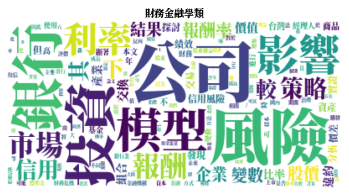

@@ 經濟學類

 [該學類之某一論文的斷詞結果]
46     [評估, 澎湖, 觀光, 賭場, 對, 當地, 經濟, 的, 衝擊, ---, 投入產出, ...
65     [教育, 型態, 與, 所得, 不均, 度, \n, 本文, 針對, 台灣, 三種, 教育,...
165    [人口, 內生, 、, 政府, 支出, 的, 不同, 融通, 方式, 與, 經濟, 成長, ...
204    [REITs, 與, S, &, P500, 股票市場, 波動, 來源, 之, 分析, 與,...
271    [外來, 直接, 投資, 與, 地主國, 市場, 的, 管制, 政策, \n, 本, 研究,...
321    [貿易, 網絡, 與, 產業, 特性, -, 工具機, 與, 鞋業, 的, 驗證, \n, ...
341    [上架, 費之, 經濟, 分析, 上架, 費的, 運作, 方式, 與, 權利金, 相似, ，...
Name: words, dtype: object

 [index, Paper_id]
46      47
65      66
165    166
204    205
271    272
321    322
341    342
Name: id, dtype: int64

['評估', '澎湖', '觀光', '賭場', '對', '當地', '經濟', '的', '衝擊', '---', '投入產出', '分析法', '之', '應用', '澎湖', '擁有', '豐富', '的', '觀光', '資源', '，', '但是', '澎湖', '的', '氣候', '卻', '扼殺', '了', '這些', '資源', '的', '貢獻', '，', '冬季', '時', '猛烈', '的', '東北', '季風', '通常', '自', '10', '月', '至', '隔', '年', '的', '3', '月', '，', '使得', '澎湖', '觀光業', '只能', '做', '半年', '休', '半年', '，', '澎湖', '的', '所得', '一直', '無法', '提升', '，', '於是', '有人', '提出', '觀光', '博弈', '的', '概念', '希望', '能',

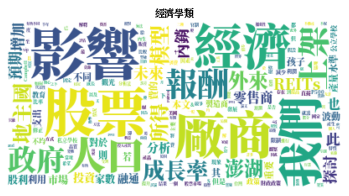

@@ 電算機一般學類

 [該學類之某一論文的斷詞結果]
11     [金融業, 電子, 帳單, 系統, 導入, 與, 成效, 關係, 之, 研究, \n, 我國...
21     [遺傳, 程式, 規劃, 為, 基礎, 的, 信用貸款, 逾期, 流入, 率, 預測, 之,...
36     [行動, 網際網路, 之, 入口, 網站, 及, 資訊, 內容, 服務, 需求, 分析, 研...
52     [以, 平衡, 計分卡, 為基, 的, 研發部門, 績效, 評估, 指標, 之, 可行性研究...
54     [智慧型, 企業, 併購, 決策, 評估, 模式, 之, 研究, –, 以, 某, 電子科技...
60     [台灣, 企業, 資訊, 倫理, 政策, 現況, 調查, 本, 研究, 主要, 目的, 乃,...
68     [宅, 配業, 車輛, 裝載, 規劃, 問題, 之, 研究, 近幾年來, ，, 宅配, 市場...
80     [知識, 移轉, 訊號, 對, 知識, 社群, 參與, 意願, 影響, 之, 研究, 知識,...
85     [網路, 拍賣, 公平, 交換, 協定, 隨著, 網際網路, 的, 普及, 與, 電子商務,...
86     [災後, 重建, 資源, 規劃, 智慧型, 決策, 模式, 之, 研究, 人類, 能力, 控...
92     [訂, 製品, 成本, 估算, 及, 訂價, 技術, 之, 研究, 在, 微利, 時代, 的...
93     [台商, 利用, B2C, 模型, 進入, 大陸, 非, 實體, 商品, 市場, 之, 可行...
94     [標的, 產品, 行銷, 組合, 決策, 模式, 之, 廣告, 預算, 分配, 及, 訂價,...
98     [旅遊, 網站, 服務, 品質, 對, 顧客, 關係, 品質, 及, 忠誠度, 影響, 之,...
99     [智慧型, 保全, 資源, 與, 監視系統, 整合, 配置, 之, 研究, -, 以台灣, ...
100    [Opensource, 架構, 下, 數位, 版權, 管理, 之, 研究, Open,  ...
106    [運用, 貝氏, 網路, 與, 關聯, 法則, 於, 產品, 推薦, 之, 研究, 近年來,...
10

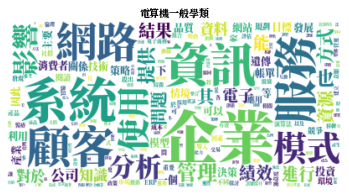

@@ 營養學類

 [該學類之某一論文的斷詞結果]
26     [包覆, 阿斯巴甜, 超, 微膠囊, 之, 安定性, 及其, 控制, 釋出, 動力學, 研究...
81     [韓國泡菜, 的, 飲食文化, 與, 營養, 保健, 之, 綜論, 研究, \n, 隨著, ...
101    [梅子, 再, 製, 酒, 之, 感官, 特性, 研究, 梅子, 由於, 酸度, 高, 、,...
176    [葉酸, 調節, 肝臟, 粒線體, 呼吸, 酵素, 複, 體, IV, 功能性, 及其, 機...
185    [米漿, 黏度, 對, 發糕, 質地, 與, 體積, 之, 影響, 本, 研究, 主要, 探...
234    [提升, 免疫調節, 的, 營養, 補充品, --, 以, 紫錐花, 為例, (, 綜論, ...
422    [葉酸, 缺乏, 促進, 年輕, 大鼠, 組織, 老化, 指標, 粒線體, DNA, 大片,...
Name: words, dtype: object

 [index, Paper_id]
26      27
81      82
101    102
176    177
185    186
234    235
422    423
Name: id, dtype: int64

['包覆', '阿斯巴甜', '超', '微膠囊', '之', '安定性', '及其', '控制', '釋出', '動力學', '研究', '阿斯巴甜', '甜味劑', '在', '水溶液', '中', '加工', '或', '貯存', '時', '不', '安定', '，', '容易', '受水', '活性', '、', 'pH', '值', '、', '溫度', '及', '光照', '的', '影響', '，', '尤其', '在', '受熱', '時會', '裂解', '而', '失去', '甜味', '。', '故', '研究', '目的', '在於', '製備', '熱', '穩定', '膠囊化', '阿斯巴甜', '，', '以', '減緩', '高溫', '烤', '焙', '時的熱', '破壞', '。', '而', '高度', '熱', '穩定', '之', '膠囊', '，', '其', '包覆', '壁', '材質',

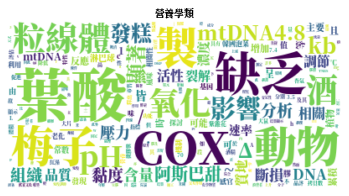

@@ 哲學學類

 [該學類之某一論文的斷詞結果]
3      [從, 「, 默觀, 」, 看, 東西, 文化交流, 與, 對話, ─, ─, 十字, 若望...
25     [卡謬, 《, 薛西, 弗斯, 的, 神話, 》, 中, 對, 自殺, 的, 省思, 探討,...
30     [生活, 世界, 之, 重建, －, 以列, 維納斯, 為例, \n, 本文, 之, 核心,...
37     [愛的, 哲學, --, 從, 柏拉圖, 的, 愛到, 亞里, 斯多德, 的, 友愛, 愛,...
91     [用, 哲學, 諮商, 方法論, 兩性關係, 一九八一年, ，, 德國, 哲學家, 吉德, ...
119    [試析, 莊子, 「, 為, 道, 」, 之, 路, 本文, 著重, 莊子, 「, 為, 道...
Name: words, dtype: object

 [index, Paper_id]
3        4
25      26
30      31
37      38
91      92
119    120
Name: id, dtype: int64

['從', '「', '默觀', '」', '看', '東西', '文化交流', '與', '對話', '─', '─', '十字', '若望', '與', '莊子', '的', '對', '談', '\n', '本文', '是從', '「', '默觀', '」', '來看', '東西', '文化交流', '與', '對話', '，', '分別', '藉由', '莊子', '與', '十字', '若望', '來', '進行', '兩者', '的', '「', '默觀', '」', '對談', '。', '文中', '分別', '簡介', '密契', '主義', '的', '意義', '及', '分類', '，', '指出', '「', '默觀', '」', '結合', '面向', '，', '非', '一般', '認知', '。', '另外', '也', '指出', '，', '史坦斯', '、', '蔡納', '及關', '永中', '對於', '密契', '主義', '的', '分類', '。', '接著', '分別', '由', '中國', '神祕主義', '傳統', 

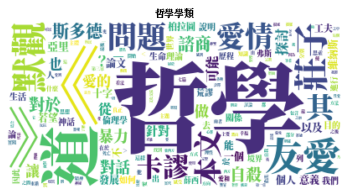

@@ 社會工作學類

 [該學類之某一論文的斷詞結果]
187    [非營利, 組織, 捐款者, 忠誠度, 之, 分析, 研究, --, 以, 某, 社會福利,...
328    [大專院校, 資源, 教室, 輔導, 人員, 離職, 經驗, 之, 敘說, 性, 研究, \...
340    [脫貧, 婦女, 復原, 力, 建構, 歷程, 之, 初探, 貧窮, 人口, 雖然, 男性,...
Name: words, dtype: object

 [index, Paper_id]
187    188
328    329
340    341
Name: id, dtype: int64

['非營利', '組織', '捐款者', '忠誠度', '之', '分析', '研究', '--', '以', '某', '社會福利', '基金會', '兒童', '服務', '方案', '為例', '「', '募款', '行為', '」', '是', '非營利', '組織', '的', '特性', '，', '亦', '為', '非營利', '組織', '賴以', '維持', '的', '主要', '來源', '之', 'ㄧ', '，', '對', '受', '捐', '組織', '而言', '具有', '自主', '運用', '之', '優點', '。', '故', '近來', '在', '實務', '界及', '學術界', '對此', '一', '民間', '資源', '日漸', '重視', '。', '而', '歷來', '相關', '研究', '，', '亦', '多', '針對', '捐款人', '進行', '動機', '、', '行為', '、', '或', '影響', '捐款人', '捐款', '因素', '進行', '研究', '，', '但', '對於', '捐款者', '的', '維繫', '，', '卻', '甚少', '關注', '。', '然', '捐款者', '之', '維繫', '，', '實為', '降低', '募款', '成本', '，', '創造', '募款', '最大', '獲益', '之', '因素', '。', '故', '在', '此', '情形', '下', '，', '研究者', '與', '某', '社會福利', '基金

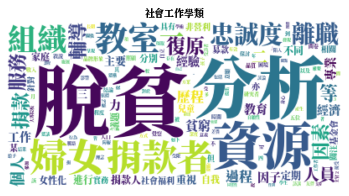

@@ 統計學類

 [該學類之某一論文的斷詞結果]
4      [估計, Gamma, 製程, 中, 干擾, 啟始, 時間, 之, 研究, \n, 製程, ...
5      [應用, 平衡, 計分卡, 觀點, 於, 護理人員, 離職, 意願, 之, 研究, \n, ...
31     [銀行, 授信, 資產, 組合, 信用風險, 值, 衡量, 之, 過程, 研究, 本, 研究...
35     [來台, 旅客, 參與, 觀光, 旅遊線, 之, 消費, 型態, 研究, 近年來, 隨著, ...
38     [寧握, 護理, 對, 早產兒, 接受, 侵入, 性, 治療, 後, 生理性, 影響, 之,...
47     [平衡, 計分卡, 於, 護理人員, 工作, 壓力, 上, 之, 應用, 論文, 摘要, 內...
62     [電話, 詐欺, 犯罪, 特性, 之, 研究, －, 以, 台北, 縣為例, \n, 論文,...
66     [顧客, 對金控, 商業銀行, 服務, 滿意度, 與, 偏好, 之, 研究, 在, 目前, ...
67     [理財, 商品, 決策, 因素, 之, 研究, 在, 理財, 觀念, 盛行, 且, 理財, ...
87     [泌尿系統, 感染, 症, 門診, 醫療, 資源, 之, 研究, \n, 本, 研究, 目的...
103    [智慧型, Ridit, 分析, 輔助, 系統, 之, 研究, Ridit, 分析, 是, ...
124    [醫院, 門診, 病患, 就診, 滿意度, 研究, ---, 以, 某, 教學, 醫院, 為...
154    [賭博, 犯罪, 因素, 之, 研究, -, 以, 臺北縣, 為例, 摘,  ,  ,  ,...
160    [資訊, 產品, 流通業, -, 印表機, 行銷, 通路, 的, 研究, 印表機, 隨著, ...
180    [國際型, 股票, 基金, 之, 研究, 在, 日漸, 自由化, 與, 全球化, 的, 投資...
186    [台灣, 商業銀行, 風險, 值, 方法, 的, 驗證, 與, 衡量, 由於, 新巴, 賽爾...
188    [整合, 羅吉斯, 迴歸, 分析, 與類, 神經, 網路, 建構, 兩, 階段, 之, 財務...
189  

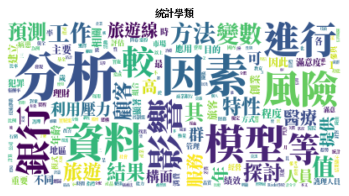

@@ 教育行政學類

 [該學類之某一論文的斷詞結果]
28     [臺北縣, 公立, 國民小學, 創新, 環境, 與, 教師, 教學, 創新, 行為, 之, ...
59     [桃園縣, 高中, 職, 軍訓教官, 角色, 行為, 與, 工作, 績效, 之, 研究, \...
69     [台北市, 國民小學, 家長, 心目, 中, 理想, 校長, 條件, 之, 研究, 本, 研...
88     [國民小學, 九年, 一貫, 教學輔導, 團團, 隊, 凝聚力, 與, 團體, 層次, 組織...
212    [台北, 縣, 國民小學, 教師, 對, 親師, 衝突, 知覺, 與, 衝突, 管理策略, ...
219    [國民中學, 初任, 教師, 工作, 適應, 及其, 影響, 因素, 之, 研究, \n, ...
240    [臺北市, 國民中學, 教師, 角色, 認同, 與, 組織, 公民, 行為, 關係, 之, ...
247    [台北市, 公立, 國民中學, 學校, 願景, 發展, 與, 教師, 工作, 士氣, 之, ...
256    [國民中學, 訓導主任, 角色, 壓力, ,, 人際關係, 與, 壓力, 因應, 策略, 之...
265    [台北, 縣, 國民小學, 教師, 專業, 角色, 知覺, 與, 教師, 效能, 關係, 之...
324    [建構, 接納, 包容, 班級, 之, 行動, 研究, 本, 研究, 的, 主要, 目的, ...
356    [教練, 轉型, 領導, 行為, 影響, 選手, 組織, 承諾, 與, 選手, 滿意度, 之...
377    [台北市, 公立, 國民小學, 教師, 全球, 視野, 認知, 與, 影響, 因素, 之, ...
401    [國民小學, 家長, 參與, 校務, 因素, 與, 類型, 之, 研究, —, 以, 臺北縣...
403    [臺北縣, 國民, 中小學, 員生, 消費, 合作社, 經營, 功能, 、, 困境, 與, ...
411    [國民, 小學校長, 營造, 教師, 社群, 行為, 與, 教師, 專業, 社群, 表現, ...
424    [國民小學, 藏書票, 教育, 實施, 現況, 之, 研究, -, 以, 臺北縣, 為例, ...
Nam

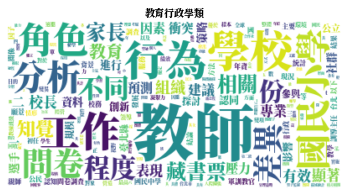

@@ 服飾學類

 [該學類之某一論文的斷詞結果]
13     [運動, 休閒服, 消費者, 行為, 之, 研究, 有, 鑒, 於, 休閒, 運動, 日益,...
89     [組織, 資源, 、, 組織, 特性, 對, 新, 產品開發, 績效, 之, 研究, －, ...
104    [張愛玲, 小說, 中, 書寫, 服裝, 寫作, 策略, 的, 探討, —, —, 以, 〈...
128    [化學, 防護服, 材料, 之, 專利, 分析, 夲, 研究, 分析, 從, 1980, 到...
174    [影響, 服裝, 產業, 銷售量, 預測, 之, 因素, 探討, —, 以, 童裝, 為例,...
225    [流行, 品牌女裝, 延伸, 男裝, 品牌, 名稱, 不, 一致, 對, 消費者, 購買, ...
325    [國際, 紡織, 成衣, 業, 新星, 經營策略, 與, 績效, 分析, —, 以, ZAR...
359    [供應商, 與, 買方, 合作, 關係, 持續性, 影響, 因素, 之, 探討, --, 以...
387    [保養品, 廣告, 訴求, 對, 廣告, 效果, 影響, 之, 研究, 以, 性別, 認知,...
392    [汽車, 用, 安全氣囊, 布料, 之, 專利, 及, 材料, 分析, 論文, 摘要, 汽車...
Name: words, dtype: object

 [index, Paper_id]
13      14
89      90
104    105
128    129
174    175
225    226
325    326
359    360
387    388
392    393
Name: id, dtype: int64

['運動', '休閒服', '消費者', '行為', '之', '研究', '有', '鑒', '於', '休閒', '運動', '日益', '盛行', '，', '現代人', '對於', '休閒', '運動', '的', '觀念', '也', '隨', '這', '社會', '的', '多元化', '的', '改變', '而', '呈現', '愈來愈', '重視', '的', '趨勢', '，', '再', '加上', '政府', '一直'

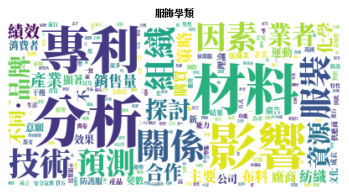

@@ 數學學類

 [該學類之某一論文的斷詞結果]
0      [次, 線性, 泛函, 之, 平滑, 性, 與, 嚴格凸, 性, 的, Asplund, 平...
55     [函數, 體上, 連分數, 的, 性質, 在, 這篇, 論文, 中, ，, 我們, 要, 敘...
78     [廣義, 能量, 泛函, 之一, 階及, 二階, 變分, 在, 本, 論文, 中, ，, 我...
90     [在, 近似, 理論, 上, 的, StrongCHIP, 和, 擾動, 性質, 這篇, 論...
171    [選擇權, 上, 的, 脈衝, 本, 論文, 以, Black, -, Scholes,  ...
253    [有關, 拉普拉斯, 變換, 與, 積分, 餘弦, 函數, 之, 逼近, 理論, 的, 研究...
Name: words, dtype: object

 [index, Paper_id]
0        1
55      56
78      79
90      91
171    172
253    254
Name: id, dtype: int64

['次', '線性', '泛函', '之', '平滑', '性', '與', '嚴格凸', '性', '的', 'Asplund', '平均化', '在', '本', '論文', '中', '，', '我們', '所', '探討', '的', '部分', '是', '有', '關於', '次', '線性', '泛函', '平滑', '性', '與', '嚴格凸', '性', '的', 'Asplund', '平均化', '；', '舉例來說', '，', '定義', '在', '所', '給定', 'Bananch', ' ', '空間', '裡', '具備', '連續', '有界', '的', '次', '線性', '泛函', '所', '形成', '之', '度量', '空間', '，', '若', '存在', '一', '集合', '是', '由', '所有', '次', '線性', '泛函', '滿足', '其', '對偶', '具備', '局部', '均勻', '嚴格凸', '性所', '形成', '，', '該', '集合', '若不為', '空集', '，', 

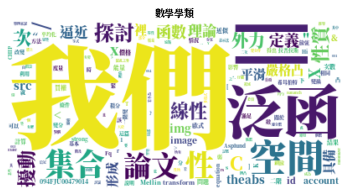

@@ 兒童保育學類

 [該學類之某一論文的斷詞結果]
49     [原住民, 阿美族, 婚姻, 感受, 與, 共, 親職, 之, 探討, --, 以, 台北,...
161    [家庭, 氣氛, 、, 親子關係, 及, 同儕, 關係, 之, 研究, －, 以, 苗栗市,...
196    [子女, 氣質, 、, 母親, 後, 設, 情緒, 理念, 與, 子女, 依附, 傾向, 的...
217    [台北市, 高職, 學生, 升學壓力, 、, 因應, 方式, 與, 身心健康, 之, 研究,...
236    [成年, 子女, 的, 孝道, 責任, 與, 焦慮, ：, 親子關係, 與, 父母, 需求,...
239    [家長, 參與, 幼兒, 入園, 準備, 及, 幼兒, 在, 幼兒園, 適應, 之, 相關,...
244    [國, 小, 教師, 知覺, 與, 外籍, 配偶, 家長, 親師, 互動, 及其, 子女, ...
245    [雙薪, 家庭, 國, 小, 高年級, 學童, 知覺, 父母, 參與, 、, 共, 親職, ...
259    [父母, 共, 親職, 動力, 歷程, \n, 本, 研究, 的, 目的, 在於, 了解, ...
282    [未婚, 教保, 人員, 單身, 壓力, 、, 婚姻, 態度, 及, 生活, 滿意度, 之,...
Name: words, dtype: object

 [index, Paper_id]
49      50
161    162
196    197
217    218
236    237
239    240
244    245
245    246
259    260
282    283
Name: id, dtype: int64

['原住民', '阿美族', '婚姻', '感受', '與', '共', '親職', '之', '探討', '--', '以', '台北', '縣市', '為例', '本', '研究', '的', '目的', '主要', '在於', '了解', '阿美族', '經過', '社會變遷', '移居', '都會區', '後', '之', '婚姻', '感受', '及', '共', '親職', '之', '現況', '及', '兩者', '之',

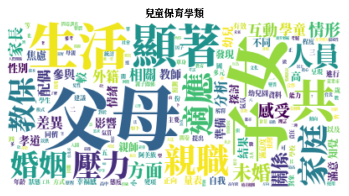

In [10]:
# 每個類別常出現的字 (文字雲)
from wordcloud import WordCloud
from collections import Counter

freqs = []
for cat in set(df_train['學類']):
    if cat != cat:
        pass
    else:
        words_Li = list(df_train[df_train['學類'] == cat]['words'])
        print('@@ {}\n\n [該學類之某一論文的斷詞結果]\n{}\n\n [index, Paper_id]\n{}\n======\n'.format(cat, df_train[df_train['學類'] == cat]['words'], df_train[df_train['學類'] == cat]['id']))
        
        total_words_in_cat = []
        for words in words_Li:
            total_words_in_cat.extend(words)
            print(words)
        print('\n===[該學類之所有論文的斷詞合併]===\n', total_words_in_cat)

        stopwords_list = ['的', '，', ',', '研究', '對', '上', '：', '透過', '了', ' ', '、', '。', '之', '-', '(', ')', '及', '與', '在', '為', '（', '）', '以', '本', '並', '有', '中', '再', ';', '；', '後', '和', '是', '而', '來', '當', '會', '或', '「', '」', '所']
        freq = Counter(total_words_in_cat)
        for w in stopwords_list:
            if w in freq:
                del freq[w]
        print('\n===[排除stopwords_list後，計算該學類之斷詞出現次數]===\n', freq)
        
        
        wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf", stopwords=stopwords_list, background_color="white").generate_from_frequencies(frequencies=freq)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear") #畫一張文字雲，字體顏色自動產生
        plt.axis("off")
        plt.title(cat, fontproperties=matplotlib.font_manager.FontProperties(fname='NotoSerifCJKtc-Black.otf'))
        plt.savefig(os.path.join('paper_category_pic', 'wordcloud_' + cat), bbox_inches='tight', pad_inches=0)
        plt.show()
        